0
1
2
3
4
5
6
7
8
9
10
11
12


<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Arath\AppData\Local\Temp\ipykernel_1764\1924516861.py:46: SyntaxWarning: invalid escape sequence '\p'
  xtick_labels.append (str(int(f[0]))+ '$\pi$')
C:\Users\Arath\AppData\Local\Temp\ipykernel_1764\1924516861.py:46: SyntaxWarning: invalid escape sequence '\p'
  xtick_labels.append (str(int(f[0]))+ '$\pi$')


AttributeError: 'Axes' object has no attribute 'set_xticklabel'

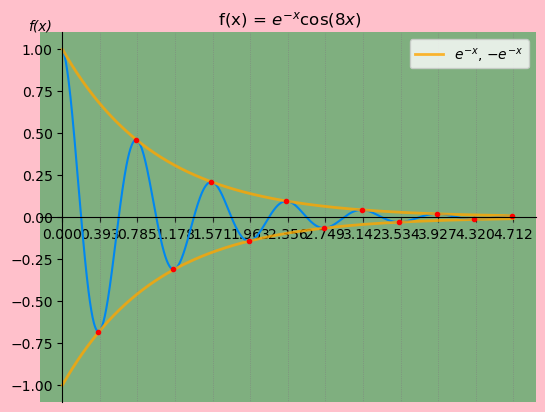

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema


OLIVE_GREEN = '#7fAf7f'
FAINT_PINK = '#FFC0CB'

def plot_equation (ax1):
    # Plot the original function
    ax1.plot(x, y, color='#0087F0')
    ax1.plot(x, y2, label=r'$e^{-x}$, $-e^{-x}$', color='orange', linewidth=2, alpha=0.8)
    ax1.plot(x, y1, label=r'', color='orange', linewidth=2, alpha=0.8)

def simplify_pow2_fraction (num : int, den : int):

    while num % 2 == 0 and den % 2 == 0:
        num = num / 2
        den = den / 2
    return num, den

def set_axes_param (ax1):
    # Set title and legend
    ax1.set_title(r' f(x) = $e^{-x} \cos(8x)$')
    ax1.legend()
    ax1.set_ylabel("f(x)", fontstyle='italic', rotation=0)
    ax1.yaxis.set_label_coords(0,ax1.get_ylim()[1] - .1) 

    #
    # Customize axis positions and ticks as before
    #
    top  = 13 / 8
    step = 1 / 8
    xticks = np.arange(0, top, step) * np.pi
    xtick_labels = []

    for i in range(len(xticks)):
        print (i)
        if i == 0:
            xtick_labels.append("")
        else:
            f = simplify_pow2_fraction (i, 8)
            if f[1] != 1:
                xtick_labels.append (r'$\frac{' + str(int(f[0])) + r'\pi}{' + str(int(f[1])) + r'}$')
            else:
                xtick_labels.append (str(int(f[0]))+ '$\pi$')

            #xtick_labels.append(r'$\frac{' + str(i) + r'\pi}{8}$')

    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xtick_labels, rotation=0)
    ax1.set_yticks([-1, 1])
    ax1.set_yticklabels(['-1', '1'])

def place_axes_lines_spines (ax1):
    # Customize spines (axes)
    ax1.spines['left'].set_position('zero')
    ax1.spines['bottom'].set_position('zero')
    ax1.spines['top'].set_color('none')
    ax1.spines['right'].set_color('none')

def get_points (map):
    x = np.linspace(0, 3 * np.pi / 2, 1000)
    y =  map (x)
    return x, y

def plot_local_maxmin (y):
    #
    # Find the local maxima (crests) and minima (troughs)
    #
    crests = argrelextrema(y, np.greater)[0]  # Indices of the local maxima
    troughs = argrelextrema(y, np.less)[0]    # Indices of the local minima
    #
    # Plot red dots at the crests and troughs
    #
    ax1.plot(x[crests], y[crests], 'ro', markersize = 3)
    ax1.plot(x[troughs], y[troughs], 'ro', markersize = 3)
    #
    # Define the x values from 0 to 3π/2
    #
fig = plt.figure()

#
# Define function domian
#
x = np.linspace(0, 3 * np.pi / 2, 1000)

#
# Define the function e^(-x) * cos(8x)
#
function_a = lambda x : np.exp(-x) * np.cos(8 * x)
function_b = lambda x : - np.exp(-x)
function_c = lambda x : np.exp(-x)

y = function_a (x)
y1 = function_b (x)
y2 = function_c (x)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_facecolor (OLIVE_GREEN)
fig.set_facecolor (FAINT_PINK)

for x1 in np.arange(0, (13 / 8), 1 / 8) * np.pi :
    ax1.axvline (x=x1, color='gray', linestyle='dotted', linewidth=.5)

place_axes_lines_spines (ax1)
plot_equation (ax1)

plot_local_maxmin (y)

set_axes_param (ax1)

# Show the plot
plt.show()